In [1]:
# importação das biliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [2]:
df = pd.read_excel("dataset_rolling_stones.xlsx")

In [3]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106


In [4]:
df.shape

(1610, 15)

In [5]:
# utiliza a função info para analisar as colunas, os tipos de dados, quantidade de linhas, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [6]:
# verifica a data de lançamento (released date), utiliza a função min para capturar o primeiro lançamento
print(f'Primeiro lançamento: {df["release_date"].min()}')

Primeiro lançamento: 1964-04-16 00:00:00


In [7]:
# verifica a data de lançamento (released date), utiliza a função min para capturar o último lançamento
print(f'Último lançamento: {df["release_date"].max()}')

Último lançamento: 2022-06-10 00:00:00


In [8]:
# usa a função is null para verificar quantos dados nulos existem no df
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [9]:
# verifica se há dados duplicados
df.duplicated().sum()

6

In [10]:
# mostra quais são os dados que estão duplicados
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


In [11]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920


In [12]:
# cria uma nova coluna capturando o valor da duration_ms dividindo por 60000 para se obter os minutos
df["duracao_em_min"] = df["duration_ms"] / 60_000

In [13]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [14]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199,4.295608
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000,0.350000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000,3.176883
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000,4.051550
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000,4.921996
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000,16.364433
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920,1.805558


In [15]:
df.groupby("album")["duracao_em_min"].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duracao_em_min, Length: 90, dtype: float64

In [16]:
# cria um novo df para armazenar o df agrupado e utiliza a função sort values para ordenar os valores
# do maior para o menor setadno o parametro ascending para False
df_maior_duracao_musica = df.groupby("album")["duracao_em_min"].mean().sort_values(ascending=False)

In [17]:
df_maior_duracao_musica

album
Havana Moon (Live)                                                      6.632819
Bridges To Bremen (Live)                                                6.332265
Jamming With Edward                                                     6.042794
Live At The Checkerboard Lounge                                         6.009647
Totally Stripped - Paris (Live)                                         5.947430
                                                                          ...   
Out Of Our Heads (UK)                                                   2.464643
Out Of Our Heads (UK Sequence)                                          2.449274
December's Children (and everybody's)                                   2.408976
December’s Children (And Everybody’s)                                   2.408532
Live 1965: Music From Charlie Is My Darling (Live From England/1965)    2.146082
Name: duracao_em_min, Length: 90, dtype: float64

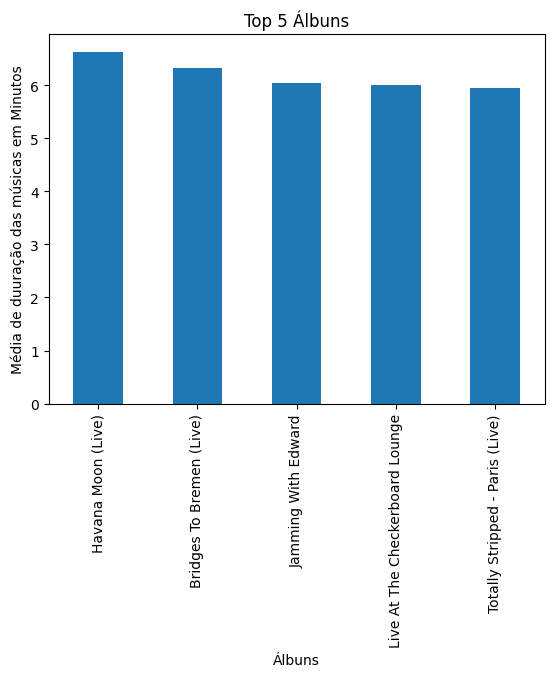

In [18]:
# visualiza o 5 albuns com a maior duração de min entre as musicas
df_maior_duracao_musica.head(5).plot(kind="bar")
plt.title("Top 5 Álbuns")
plt.xlabel("Álbuns")
plt.ylabel("Média de duuração das músicas em Minutos")
plt.show()

In [19]:
top_albums = df['album'].value_counts().head(10)
top_albums

album
Voodoo Lounge Uncut (Live)         56
Honk (Deluxe)                      47
Live Licks                         46
Tattoo You (Super Deluxe)          46
Some Girls (Deluxe Version)        44
Goats Head Soup (Deluxe)           37
Flashpoint                         34
Sticky Fingers (Super Deluxe)      33
On Air (Deluxe)                    32
Live At The Checkerboard Lounge    32
Name: count, dtype: int64

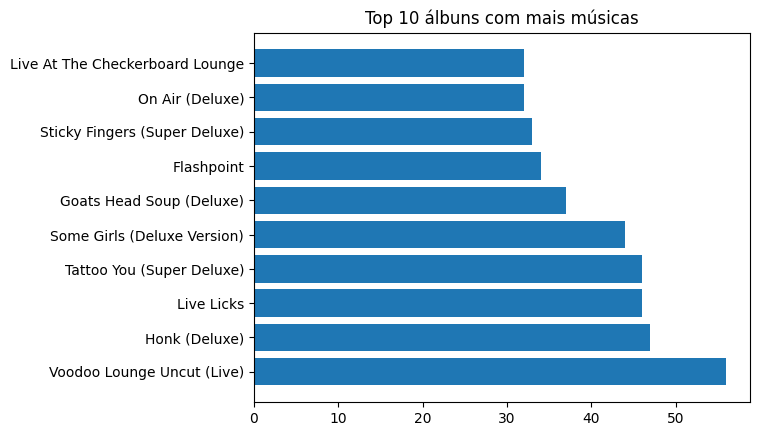

In [20]:
plt.barh(top_albums.index, top_albums.values)
plt.title("Top 10 álbuns com mais músicas")
plt.show()

In [21]:
df_ultima_decada = df[df["release_date"].between(pd.to_datetime("2011"), pd.to_datetime("2020"))]
df_ultima_decada

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
189,(I Can't Get No) Satisfaction - Live,Bridges To Buenos Aires (Live),2019-11-08,1,0.021500,0.294,0.986,0.050300,0.588,-5094.0,0.2060,142591.00,0.0918,24,320440,5.340667
190,Let's Spend The Night Together - Live,Bridges To Buenos Aires (Live),2019-11-08,2,0.108000,0.487,0.983,0.000030,0.944,-4454.0,0.2510,143.53,0.2870,24,245493,4.091550
191,Flip The Switch - Live,Bridges To Buenos Aires (Live),2019-11-08,3,0.082700,0.335,0.972,0.003720,0.931,-4931.0,0.2080,152321.00,0.3370,19,243906,4.065100
192,Gimme Shelter - Live,Bridges To Buenos Aires (Live),2019-11-08,4,0.099700,0.438,0.957,0.005540,0.774,-5064.0,0.1350,119245.00,0.2720,25,397386,6.623100
193,Sister Morphine - Live,Bridges To Buenos Aires (Live),2019-11-08,5,0.105000,0.246,0.913,0.000478,0.969,-5153.0,0.0921,80371.00,0.3320,19,379800,6.330000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,Tumbling Dice - Live,Some Girls: Live In Texas '78,2011-11-21,13,0.007690,0.384,0.980,0.075100,0.853,-5591.0,0.0897,119366.00,0.5550,19,278893,4.648217
604,Happy - Live,Some Girls: Live In Texas '78,2011-11-21,14,0.006860,0.171,0.989,0.000475,0.904,-4568.0,0.1640,157806.00,0.3820,18,192746,3.212433
605,Sweet Little Sixteen - Live,Some Girls: Live In Texas '78,2011-11-21,15,0.001990,0.272,0.948,0.004040,0.920,-4756.0,0.1020,171815.00,0.8190,20,191493,3.191550
606,Brown Sugar - Live,Some Girls: Live In Texas '78,2011-11-21,16,0.000497,0.184,0.973,0.275000,0.954,-4176.0,0.0656,156605.00,0.6000,17,194453,3.240883


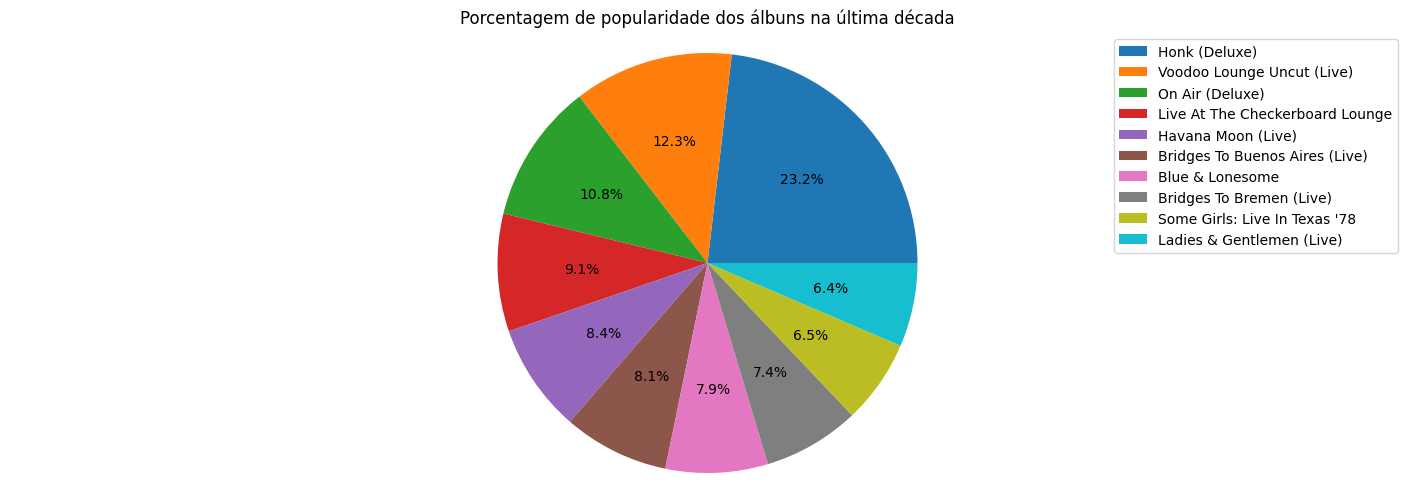

In [22]:
df_por_album = df_ultima_decada.groupby("album")["popularity"].sum().sort_values(ascending=False).head(10)

total_popularidade = df_por_album.sum()

df_porcentagem = (df_por_album/total_popularidade) * 100

labels = df_porcentagem.index.tolist()
sizes = df_porcentagem.values.tolist()

figura, grafico = plt.subplots(figsize=(18,6))
grafico.pie(sizes, autopct="%1.1f%%")
grafico.axis('equal')
plt.title("Porcentagem de popularidade dos álbuns na última década")
plt.legend(labels, loc="best")
plt.tight_layout
plt.show()

Text(0.5, 1.0, 'Boxplot')

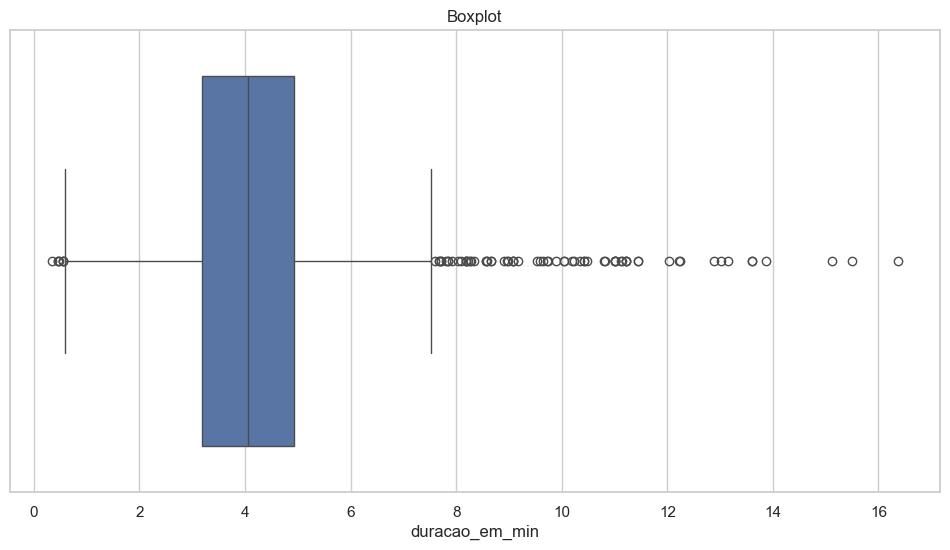

In [23]:
sns.set(style="whitegrid")
fig, axis = plt.subplots(figsize=(12,6))
sns.boxplot(x="duracao_em_min", data=df)
axis.set_title("Boxplot")

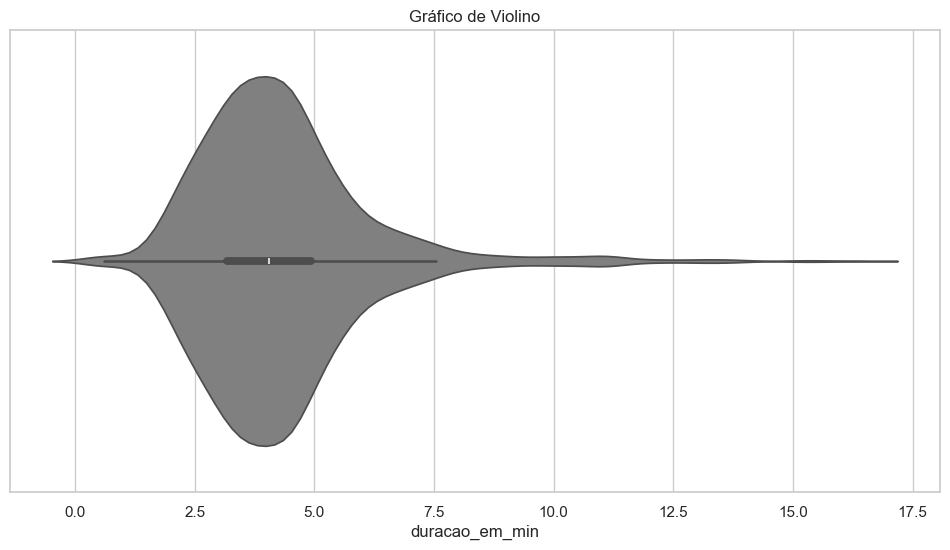

In [24]:
fig, axis = plt.subplots(figsize=(12,6))
sns.violinplot(x="duracao_em_min", data=df, color="gray")
axis.set_title("Gráfico de Violino")
plt.show()

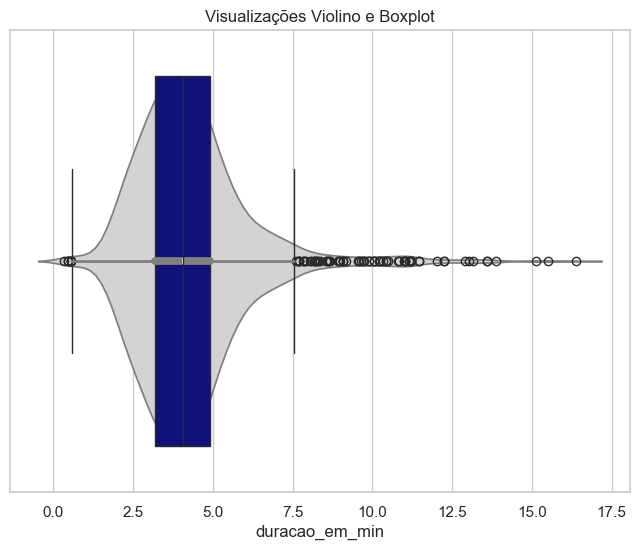

In [25]:
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(x="duracao_em_min", data=df, ax=ax, whis=1.5, color="darkblue")
sns.violinplot(x="duracao_em_min", data=df, ax=ax, color="lightgray")

ax.set_title("Visualizações Violino e Boxplot")

plt.show()

In [26]:
def classifica_musica_ao_vivo(df):
  if df["liveness"] >= 0.8:
    return True
  else:
    return False

In [27]:
df["ao_vivo"] = df.apply(classifica_musica_ao_vivo, axis=1)
df.head(10)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.00,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.00,0.3180,34,253173,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.00,0.3130,34,263160,4.386000,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.00,0.1470,32,305880,5.098000,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.00,0.2060,32,305106,5.085100,True
5,Monkey Man - Live,Licked Live In NYC,2022-06-10,6,0.2750,0.340,0.956,0.125000,0.741,-5539.0,0.0915,101628.00,0.1250,31,244293,4.071550,False
6,Angie - Live,Licked Live In NYC,2022-06-10,7,0.5610,0.262,0.810,0.000003,0.972,-6851.0,0.0969,77.52,0.3940,31,245506,4.091767,True
7,Let It Bleed - Live,Licked Live In NYC,2022-06-10,8,0.3170,0.413,0.971,0.000267,0.993,-5509.0,0.0873,128958.00,0.4840,30,313586,5.226433,True
8,Midnight Rambler - Live,Licked Live In NYC,2022-06-10,9,0.4160,0.268,0.942,0.040800,0.959,-6018.0,0.1190,139452.00,0.2850,30,781173,13.019550,True
9,Tumbling Dice - Live,Licked Live In NYC,2022-06-10,10,0.4010,0.310,0.944,0.075200,0.974,-5074.0,0.1280,119782.00,0.1880,29,333413,5.556883,True


In [28]:
df.groupby(df["ao_vivo"])["ao_vivo"].count()

ao_vivo
False    1112
True      498
Name: ao_vivo, dtype: int64

In [29]:
df_gravado_em_estudio = df[df["ao_vivo"] == False]
df_show_ao_vivo = df[df["ao_vivo"] == True]

In [30]:
df_show_ao_vivo["ao_vivo"].unique()

array([ True])

In [31]:
df_gravado_em_estudio["ao_vivo"].unique()

array([False])

In [32]:
print(f"Média das músicas ao vivo: {df_show_ao_vivo['duracao_em_min'].mean()}")

Média das músicas ao vivo: 5.088648962516734


In [33]:
print(f"Média das músicas em estúdio: {df_gravado_em_estudio['duracao_em_min'].mean()}")

Média das músicas em estúdio: 3.940451363908873


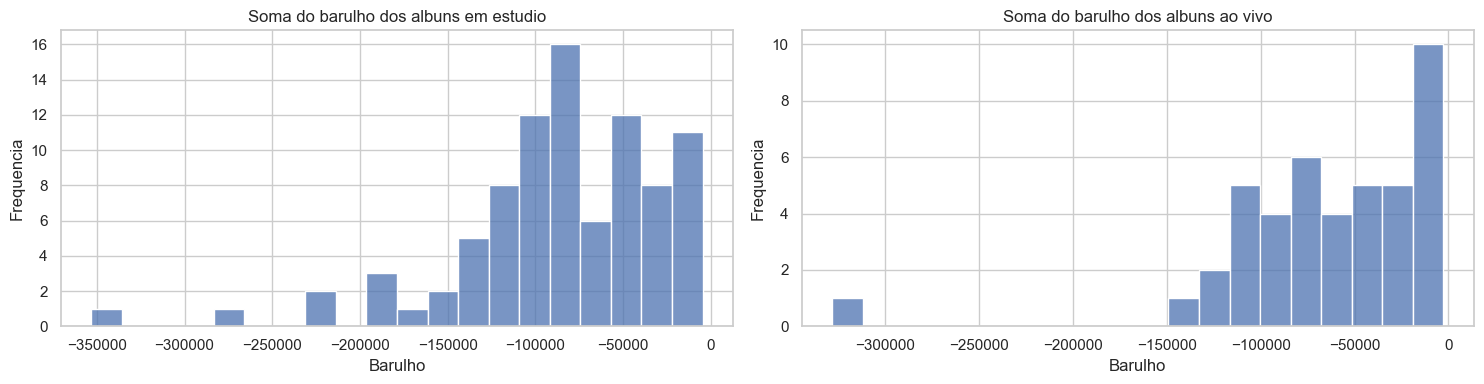

In [34]:
df_estudio = df_gravado_em_estudio.groupby("album")["loudness"].sum()
df_ao_vivo = df_show_ao_vivo.groupby("album")["loudness"].sum()

fig, axis = plt.subplots(1, 2, figsize=(15,4))

sns.histplot(data=df_estudio, bins=20, ax=axis[0])
axis[0].set_title("Soma do barulho dos albuns em estudio")
axis[0].set_xlabel("Barulho")
axis[0].set_ylabel("Frequencia")
sns.histplot(data=df_ao_vivo, bins=20, ax=axis[1])
axis[1].set_title("Soma do barulho dos albuns ao vivo")
axis[1].set_xlabel("Barulho")
axis[1].set_ylabel("Frequencia")

fig.tight_layout()

plt.show()

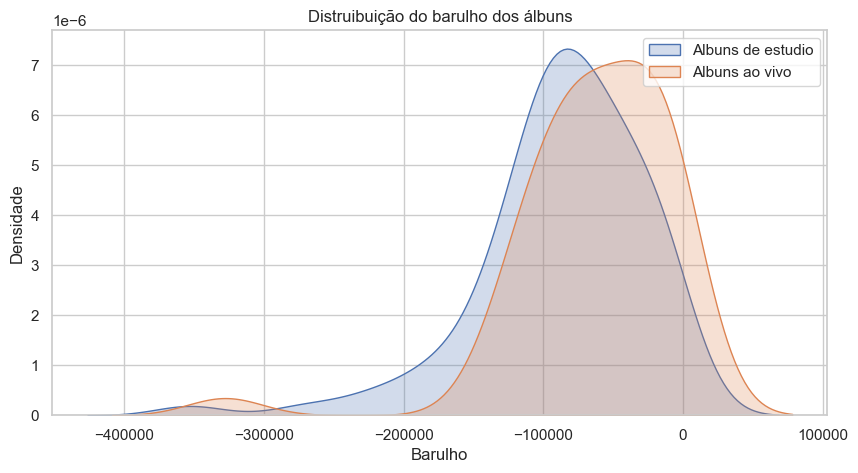

In [35]:
plt.figure(figsize=(10, 5))

sns.kdeplot(data=df_estudio, label="Albuns de estudio", fill=True)
sns.kdeplot(data=df_ao_vivo, label="Albuns ao vivo", fill=True)

plt.title("Distruibuição do barulho dos álbuns")
plt.xlabel("Barulho")
plt.ylabel("Densidade")
plt.legend()

plt.show()

In [36]:
stats, p = shapiro(df_estudio)
print(f"Soma do barulho do álbuns de estudio: ")
print(f"Estatistica de teste: {stats:.4f}, valor p: {p}")

if p > 0.05:
  print("Não há evidência suficiente para rejeitar a hipótese de normalidade")
else:
  print("A hipótese de normalidade é rejeitada")


Soma do barulho do álbuns de estudio: 
Estatistica de teste: 0.8958, valor p: 3.2961810837730903e-06
A hipótese de normalidade é rejeitada


In [37]:
stats, p = shapiro(df_ao_vivo)
print(f"Soma do barulho do álbuns ao vivo: ")
print(f"Estatistica de teste: {stats:.4f}, valor p: {p}")

if p > 0.05:
  print("Não há evidência suficiente para rejeitar a hipótese de normalidade")
else:
  print("A hipótese de normalidade é rejeitada")


Soma do barulho do álbuns ao vivo: 
Estatistica de teste: 0.7913, valor p: 2.35060091497093e-06
A hipótese de normalidade é rejeitada


In [38]:
stat, p = mannwhitneyu(df_estudio.sample(len(df_estudio)), df_ao_vivo.sample(len(df_ao_vivo)), alternative="less")

print(f"Estatística de teste U: {stat}")
print(f"Valor p: {p}")

alpha = 0.05

if p < alpha:
  print("Diferença estatisticamente significante")
else:
  print("Não há diferença estatisticamente significante")

Estatística de teste U: 1367.0
Valor p: 0.0050727361177996585
Diferença estatisticamente significante


In [39]:
media_por_album = df.groupby("album")["valence"].mean().reset_index()

media_por_album = media_por_album.rename(columns={"valence": "media_valence"})

media_por_album["sentimento"] = ["positivo" if v > 0.6 else "negativo" for v in media_por_album["media_valence"]]

media_por_album.groupby("sentimento")["sentimento"].count()

sentimento
negativo    38
positivo    52
Name: sentimento, dtype: int64

In [40]:
df_resultado_final = pd.merge(df, media_por_album, on = "album")
df_resultado_final

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo,media_valence,sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.9320,-12913.0,0.1100,118001.00,0.0302,33,48640,0.810667,True,0.271170,negativo
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.9610,-4803.0,0.0759,131455.00,0.3180,34,253173,4.219550,True,0.271170,negativo
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.9560,-4936.0,0.1150,130066.00,0.3130,34,263160,4.386000,True,0.271170,negativo
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.8950,-5535.0,0.1930,132994.00,0.1470,32,305880,5.098000,True,0.271170,negativo
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.9660,-5098.0,0.0930,130533.00,0.2060,32,305106,5.085100,True,0.271170,negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.932,0.006170,0.3240,-9214.0,0.0429,177.34,0.9670,39,154080,2.568000,False,0.745583,positivo
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.706,0.000002,0.5160,-9427.0,0.0843,122015.00,0.4460,36,245266,4.087767,False,0.745583,positivo
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.774,0.000000,0.0669,-7961.0,0.0720,97035.00,0.8350,30,176080,2.934667,False,0.745583,positivo
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.546,0.000070,0.1660,-9567.0,0.0622,102634.00,0.5320,27,121680,2.028000,False,0.745583,positivo


In [43]:
matriz_correlacao = df_resultado_final.corr(numeric_only=True)

correlacao_sentimento = matriz_correlacao["media_valence"]

display(correlacao_sentimento)

track_number       -0.115007
acousticness        0.015491
danceability        0.492945
energy             -0.347447
instrumentalness    0.133741
liveness           -0.571749
loudness           -0.229543
speechiness        -0.416005
tempo              -0.028887
valence             0.603258
popularity          0.100509
duration_ms        -0.309499
duracao_em_min     -0.309499
ao_vivo            -0.549736
media_valence       1.000000
Name: media_valence, dtype: float64

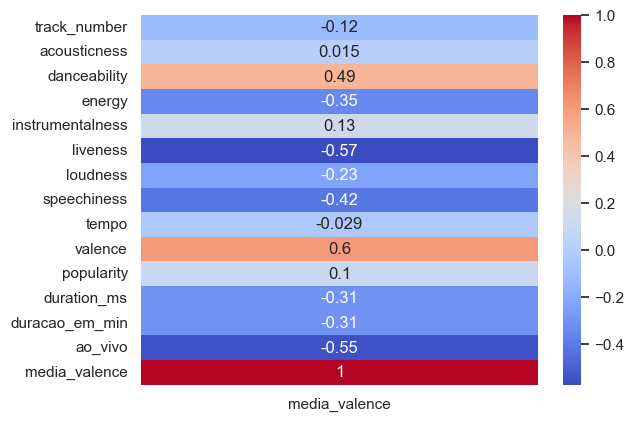

In [47]:
sns.heatmap(correlacao_sentimento.to_frame(), annot=True, cmap = "coolwarm")
plt.show()

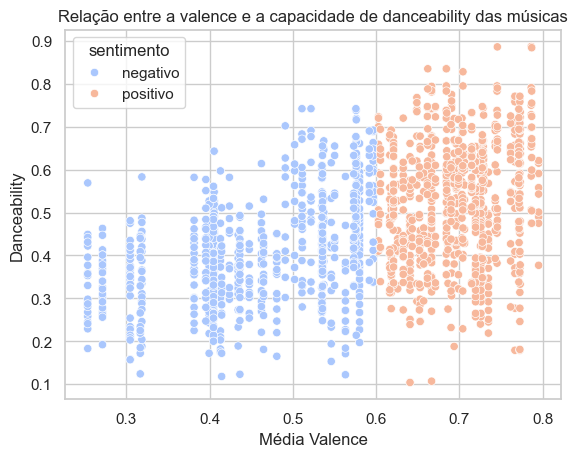

In [53]:
sns.scatterplot(x="media_valence", y="danceability", hue="sentimento", data=df_resultado_final, palette = "coolwarm")
plt.xlabel("Média Valence")
plt.ylabel("Danceability")
plt.title("Relação entre a valence e a capacidade de danceability das músicas")
plt.show()

[]

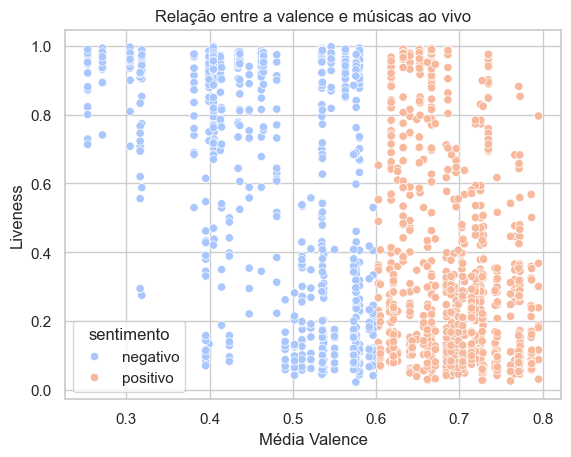

In [56]:
sns.scatterplot(x="media_valence", y="liveness", hue="sentimento", data=df_resultado_final, palette="coolwarm")
plt.xlabel("Média Valence")
plt.ylabel("Liveness")
plt.title("Relação entre a valence e músicas ao vivo")
plt.plot()